In [5]:
#!/usr/bin/env python3
'''
Modulus that builds a modified version of the LeNet-5
architecture using keras
'''
import tensorflow.keras as K


def lenet5(X):
    '''
    Function that builds a modified version of the LeNet-5
    architecture using keras
    '''
    L = K.layers.Conv2D(6, (5, 5), padding='same', activation='relu', kernel_initializer ='he_normal')(X)
    L = K.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(L)
    L = K.layers.Conv2D(16, (5, 5), padding='valid', activation='relu', kernel_initializer ='he_normal')(L)
    L = K.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(L)
    L = K.layers. Flatten()(L)

    L = K.layers.Dense(120, activation='relu', kernel_initializer ='he_normal')(L)
    L = K.layers.Dense(84, activation='relu', kernel_initializer ='he_normal')(L)
    L = K.layers.Dense(10, activation='softmax', kernel_initializer ='he_normal')(L)

    model = K.Model(X, L)
    adam = K.optimizers.Adam()
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/5
1563/1563 [==============================] - 16s 6ms/step - loss: 0.1659 - accuracy: 0.9488 - val_loss: 0.0631 - val_accuracy: 0.9815
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0603 - accuracy: 0.9810 - val_loss: 0.0573 - val_accuracy: 0.9831
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0412 - accuracy: 0.9870 - val_loss: 0.0453 - val_accuracy: 0.9857
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0430 - val_accuracy: 0.9870
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0444 - val_accuracy: 0.9879
[1.3724893e-14 8.5010714e-11 1.5515292e-12 1.0000000e+00 2.2760556e-17
 1.9661552e-09 7.0564079e-14 1.9629185e-12 5.4041455e-11 7.1669400e-11]


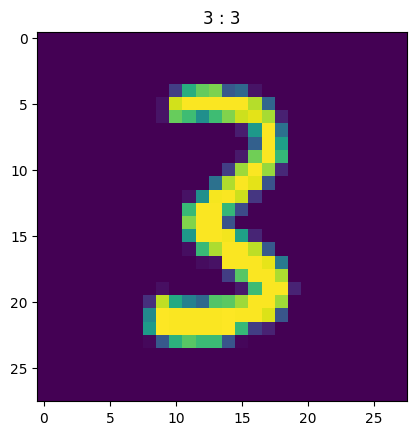

In [6]:
#!/usr/bin/env python3
"""
Main file
"""
# Force Seed - fix for Keras
SEED = 0
import matplotlib.pyplot as plt
import os
os.environ['PYTHONHASHSEED'] = str(SEED)
import random
random.seed(SEED)
import numpy as np
np.random.seed(SEED)
import tensorflow as tf
tf.random.set_seed(SEED)
import tensorflow.keras as K

# lenet5 = __import__('5-lenet5').lenet5

if __name__ == "__main__":
    lib = np.load('../data/MNIST.npz')
    X_train = lib['X_train']
    m, h, w = X_train.shape
    X_train_c = X_train.reshape((-1, h, w, 1))
    Y_train = lib['Y_train']
    Y_train_oh = K.utils.to_categorical(Y_train, num_classes=10)
    X_valid = lib['X_valid']
    X_valid_c = X_valid.reshape((-1, h, w, 1))
    Y_valid = lib['Y_valid']
    Y_valid_oh = K.utils.to_categorical(Y_valid, num_classes=10)
    X = K.Input(shape=(h, w, 1))
    model = lenet5(X)
    batch_size = 32
    epochs = 5
    model.fit(X_train_c, Y_train_oh, batch_size=batch_size, epochs=epochs,
                       validation_data=(X_valid_c, Y_valid_oh))
    Y_pred = model.predict(X_valid_c)
    print(Y_pred[0])
    Y_pred = np.argmax(Y_pred, 1)
    plt.imshow(X_valid[0])
    plt.title(str(Y_valid[0]) + ' : ' + str(Y_pred[0]))
    plt.show()
